# INTRODUCTION TO DATA ANALYSIS

## *What is pandas?*

- Powerful toolkit for analyzing structured data

- Built ontop of NumPy

- Provides specialized types, methods and functions for data analysis, offering excellent support for taasks related to data analysis and mining.

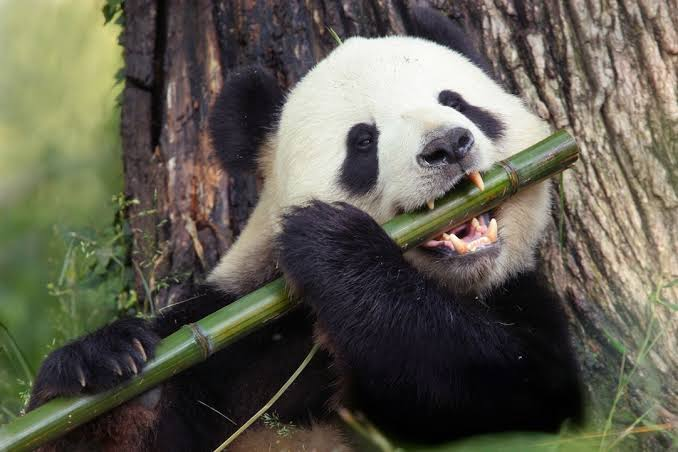
  

In [ ]:
# @title Setup
import io
import sqlite3

CSV_STRING = """
#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
7,Squirtle,Water,,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,,530,79,83,100,85,105,78,1,False
9,BlastoiseMega Blastoise,Water,,630,79,103,120,135,115,78,1,False
10,Caterpie,Bug,,195,45,30,35,20,20,45,1,False
11,Metapod,Bug,,205,50,20,55,25,25,30,1,False
12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,1,False
17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,False
18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False
18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
19,Rattata,Normal,,253,30,56,35,25,35,72,1,False
20,Raticate,Normal,,413,55,81,60,50,70,97,1,False
21,Spearow,Normal,Flying,262,40,60,30,31,31,70,1,False
22,Fearow,Normal,Flying,442,65,90,65,61,61,100,1,False
23,Ekans,Poison,,288,35,60,44,40,54,55,1,False
24,Arbok,Poison,,438,60,85,69,65,79,80,1,False
25,Pikachu,Electric,,320,35,55,40,50,50,90,1,False
26,Raichu,Electric,,485,60,90,55,90,80,110,1,False
27,Sandshrew,Ground,,300,50,75,85,20,30,40,1,False
28,Sandslash,Ground,,450,75,100,110,45,55,65,1,False
29,Nidoran♀,Poison,,275,55,47,52,40,40,41,1,False
30,Nidorina,Poison,,365,70,62,67,55,55,56,1,False
31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,76,1,False
32,Nidoran♂,Poison,,273,46,57,40,40,40,50,1,False
33,Nidorino,Poison,,365,61,72,57,55,55,65,1,False
34,Nidoking,Poison,Ground,505,81,102,77,85,75,85,1,False
35,Clefairy,Fairy,,323,70,45,48,60,65,35,1,False
36,Clefable,Fairy,,483,95,70,73,95,90,60,1,False
37,Vulpix,Fire,,299,38,41,40,50,65,65,1,False
38,Ninetales,Fire,,505,73,76,75,81,100,100,1,False
39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
42,Golbat,Poison,Flying,455,75,80,70,65,75,90,1,False
43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False
45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
46,Paras,Bug,Grass,285,35,70,55,45,55,25,1,False
47,Parasect,Bug,Grass,405,60,95,80,60,80,30,1,False
48,Venonat,Bug,Poison,305,60,55,50,40,55,45,1,False
49,Venomoth,Bug,Poison,450,70,65,60,90,75,90,1,False
50,Diglett,Ground,,265,10,55,25,35,45,95,1,False
51,Dugtrio,Ground,,405,35,80,50,50,70,120,1,False
52,Meowth,Normal,,290,40,45,35,40,40,90,1,False
53,Persian,Normal,,440,65,70,60,65,65,115,1,False
54,Psyduck,Water,,320,50,52,48,65,50,55,1,False
55,Golduck,Water,,500,80,82,78,95,80,85,1,False
56,Mankey,Fighting,,305,40,80,35,35,45,70,1,False
57,Primeape,Fighting,,455,65,105,60,60,70,95,1,False
58,Growlithe,Fire,,350,55,70,45,70,50,60,1,False
59,Arcanine,Fire,,555,90,110,80,100,80,95,1,False
60,Poliwag,Water,,300,40,50,40,40,40,90,1,False
61,Poliwhirl,Water,,385,65,65,65,50,50,90,1,False
62,Poliwrath,Water,Fighting,510,90,95,95,70,90,70,1,False
63,Abra,Psychic,,310,25,20,15,105,55,90,1,False
64,Kadabra,Psychic,,400,40,35,30,120,70,105,1,False
65,Alakazam,Psychic,,500,55,50,45,135,95,120,1,False
65,AlakazamMega Alakazam,Psychic,,590,55,50,65,175,95,150,1,False
66,Machop,Fighting,,305,70,80,50,35,35,35,1,False
67,Machoke,Fighting,,405,80,100,70,50,60,45,1,False
68,Machamp,Fighting,,505,90,130,80,65,85,55,1,False
69,Bellsprout,Grass,Poison,300,50,75,35,70,30,40,1,False
70,Weepinbell,Grass,Poison,390,65,90,50,85,45,55,1,False
71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
72,Tentacool,Water,Poison,335,40,40,35,50,100,70,1,False
73,Tentacruel,Water,Poison,515,80,70,65,80,120,100,1,False
74,Geodude,Rock,Ground,300,40,80,100,30,30,20,1,False
75,Graveler,Rock,Ground,390,55,95,115,45,45,35,1,False
76,Golem,Rock,Ground,495,80,120,130,55,65,45,1,False
77,Ponyta,Fire,,410,50,85,55,65,65,90,1,False
78,Rapidash,Fire,,500,65,100,70,80,80,105,1,False
79,Slowpoke,Water,Psychic,315,90,65,65,40,40,15,1,False
80,Slowbro,Water,Psychic,490,95,75,110,100,80,30,1,False
80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
81,Magnemite,Electric,Steel,325,25,35,70,95,55,45,1,False
82,Magneton,Electric,Steel,465,50,60,95,120,70,70,1,False
83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False
84,Doduo,Normal,Flying,310,35,85,45,35,35,75,1,False
85,Dodrio,Normal,Flying,460,60,110,70,60,60,100,1,False
86,Seel,Water,,325,65,45,55,45,70,45,1,False
87,Dewgong,Water,Ice,475,90,70,80,70,95,70,1,False
88,Grimer,Poison,,325,80,80,50,40,50,25,1,False
89,Muk,Poison,,500,105,105,75,65,100,50,1,False
90,Shellder,Water,,305,30,65,100,45,25,40,1,False
91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
92,Gastly,Ghost,Poison,310,30,35,30,100,35,80,1,False
93,Haunter,Ghost,Poison,405,45,50,45,115,55,95,1,False
94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,1,False
94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False
96,Drowzee,Psychic,,328,60,48,45,43,90,42,1,False
97,Hypno,Psychic,,483,85,73,70,73,115,67,1,False
98,Krabby,Water,,325,30,105,90,25,25,50,1,False
99,Kingler,Water,,475,55,130,115,50,50,75,1,False
100,Voltorb,Electric,,330,40,30,50,55,55,100,1,False
101,Electrode,Electric,,480,60,50,70,80,80,140,1,False
102,Exeggcute,Grass,Psychic,325,60,40,80,60,45,40,1,False
103,Exeggutor,Grass,Psychic,520,95,95,85,125,65,55,1,False
104,Cubone,Ground,,320,50,50,95,40,50,35,1,False
105,Marowak,Ground,,425,60,80,110,50,80,45,1,False
106,Hitmonlee,Fighting,,455,50,120,53,35,110,87,1,False
107,Hitmonchan,Fighting,,455,50,105,79,35,110,76,1,False
108,Lickitung,Normal,,385,90,55,75,60,75,30,1,False
109,Koffing,Poison,,340,40,65,95,60,45,35,1,False
110,Weezing,Poison,,490,65,90,120,85,70,60,1,False
111,Rhyhorn,Ground,Rock,345,80,85,95,30,30,25,1,False
112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False
113,Chansey,Normal,,450,250,5,5,35,105,50,1,False
114,Tangela,Grass,,435,65,55,115,100,40,60,1,False
115,Kangaskhan,Normal,,490,105,95,80,40,80,90,1,False
115,KangaskhanMega Kangaskhan,Normal,,590,105,125,100,60,100,100,1,False
116,Horsea,Water,,295,30,40,70,70,25,60,1,False
117,Seadra,Water,,440,55,65,95,95,45,85,1,False
118,Goldeen,Water,,320,45,67,60,35,50,63,1,False
119,Seaking,Water,,450,80,92,65,65,80,68,1,False
120,Staryu,Water,,340,30,45,55,70,55,85,1,False
121,Starmie,Water,Psychic,520,60,75,85,100,85,115,1,False
122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False
123,Scyther,Bug,Flying,500,70,110,80,55,80,105,1,False
124,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False
125,Electabuzz,Electric,,490,65,83,57,95,85,105,1,False
126,Magmar,Fire,,495,65,95,57,100,85,93,1,False
127,Pinsir,Bug,,500,65,125,100,55,70,85,1,False
127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
128,Tauros,Normal,,490,75,100,95,40,70,110,1,False
129,Magikarp,Water,,200,20,10,55,15,20,80,1,False
130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
132,Ditto,Normal,,288,48,48,48,48,48,48,1,False
133,Eevee,Normal,,325,55,55,50,45,65,55,1,False
134,Vaporeon,Water,,525,130,65,60,110,95,65,1,False
135,Jolteon,Electric,,525,65,65,60,110,95,130,1,False
136,Flareon,Fire,,525,65,130,60,95,110,65,1,False
137,Porygon,Normal,,395,65,60,70,85,75,40,1,False
138,Omanyte,Rock,Water,355,35,40,100,90,55,35,1,False
139,Omastar,Rock,Water,495,70,60,125,115,70,55,1,False
140,Kabuto,Rock,Water,355,30,80,90,55,45,55,1,False
141,Kabutops,Rock,Water,495,60,115,105,65,70,80,1,False
142,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False
142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
143,Snorlax,Normal,,540,160,110,65,65,110,30,1,False
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
147,Dratini,Dragon,,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,,420,61,84,65,70,70,70,1,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
150,Mewtwo,Psychic,,680,106,110,90,154,90,130,1,True
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
150,MewtwoMega Mewtwo Y,Psychic,,780,106,150,70,194,120,140,1,True
151,Mew,Psychic,,600,100,100,100,100,100,100,1,False
152,Chikorita,Grass,,318,45,49,65,49,65,45,2,False
153,Bayleef,Grass,,405,60,62,80,63,80,60,2,False
154,Meganium,Grass,,525,80,82,100,83,100,80,2,False
155,Cyndaquil,Fire,,309,39,52,43,60,50,65,2,False
156,Quilava,Fire,,405,58,64,58,80,65,80,2,False
157,Typhlosion,Fire,,534,78,84,78,109,85,100,2,False
158,Totodile,Water,,314,50,65,64,44,48,43,2,False
159,Croconaw,Water,,405,65,80,80,59,63,58,2,False
160,Feraligatr,Water,,530,85,105,100,79,83,78,2,False
161,Sentret,Normal,,215,35,46,34,35,45,20,2,False
162,Furret,Normal,,415,85,76,64,45,55,90,2,False
163,Hoothoot,Normal,Flying,262,60,30,30,36,56,50,2,False
164,Noctowl,Normal,Flying,442,100,50,50,76,96,70,2,False
165,Ledyba,Bug,Flying,265,40,20,30,40,80,55,2,False
166,Ledian,Bug,Flying,390,55,35,50,55,110,85,2,False
167,Spinarak,Bug,Poison,250,40,60,40,40,40,30,2,False
168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,False
169,Crobat,Poison,Flying,535,85,90,80,70,80,130,2,False
170,Chinchou,Water,Electric,330,75,38,38,56,56,67,2,False
171,Lanturn,Water,Electric,460,125,58,58,76,76,67,2,False
172,Pichu,Electric,,205,20,40,15,35,35,60,2,False
173,Cleffa,Fairy,,218,50,25,28,45,55,15,2,False
174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False
175,Togepi,Fairy,,245,35,20,65,40,65,20,2,False
176,Togetic,Fairy,Flying,405,55,40,85,80,105,40,2,False
177,Natu,Psychic,Flying,320,40,50,45,70,45,70,2,False
178,Xatu,Psychic,Flying,470,65,75,70,95,70,95,2,False
179,Mareep,Electric,,280,55,40,40,65,45,35,2,False
180,Flaaffy,Electric,,365,70,55,55,80,60,45,2,False
181,Ampharos,Electric,,510,90,75,85,115,90,55,2,False
181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False
182,Bellossom,Grass,,490,75,80,95,90,100,50,2,False
183,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False
184,Azumarill,Water,Fairy,420,100,50,80,60,80,50,2,False
185,Sudowoodo,Rock,,410,70,100,115,30,65,30,2,False
186,Politoed,Water,,500,90,75,75,90,100,70,2,False
187,Hoppip,Grass,Flying,250,35,35,40,35,55,50,2,False
188,Skiploom,Grass,Flying,340,55,45,50,45,65,80,2,False
189,Jumpluff,Grass,Flying,460,75,55,70,55,95,110,2,False
190,Aipom,Normal,,360,55,70,55,40,55,85,2,False
191,Sunkern,Grass,,180,30,30,30,30,30,30,2,False
192,Sunflora,Grass,,425,75,75,55,105,85,30,2,False
193,Yanma,Bug,Flying,390,65,65,45,75,45,95,2,False
194,Wooper,Water,Ground,210,55,45,45,25,25,15,2,False
195,Quagsire,Water,Ground,430,95,85,85,65,65,35,2,False
196,Espeon,Psychic,,525,65,65,60,130,95,110,2,False
197,Umbreon,Dark,,525,95,65,110,60,130,65,2,False
198,Murkrow,Dark,Flying,405,60,85,42,85,42,91,2,False
199,Slowking,Water,Psychic,490,95,75,80,100,110,30,2,False
200,Misdreavus,Ghost,,435,60,60,60,85,85,85,2,False
201,Unown,Psychic,,336,48,72,48,72,48,48,2,False
202,Wobbuffet,Psychic,,405,190,33,58,33,58,33,2,False
203,Girafarig,Normal,Psychic,455,70,80,65,90,65,85,2,False
204,Pineco,Bug,,290,50,65,90,35,35,15,2,False
205,Forretress,Bug,Steel,465,75,90,140,60,60,40,2,False
206,Dunsparce,Normal,,415,100,70,70,65,65,45,2,False
207,Gligar,Ground,Flying,430,65,75,105,35,65,85,2,False
208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
209,Snubbull,Fairy,,300,60,80,50,40,40,30,2,False
210,Granbull,Fairy,,450,90,120,75,60,60,45,2,False
211,Qwilfish,Water,Poison,430,65,95,75,55,55,85,2,False
212,Scizor,Bug,Steel,500,70,130,100,55,80,65,2,False
212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False
213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
214,Heracross,Bug,Fighting,500,80,125,75,40,95,85,2,False
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
215,Sneasel,Dark,Ice,430,55,95,55,35,75,115,2,False
216,Teddiursa,Normal,,330,60,80,50,50,50,40,2,False
217,Ursaring,Normal,,500,90,130,75,75,75,55,2,False
218,Slugma,Fire,,250,40,40,40,70,40,20,2,False
219,Magcargo,Fire,Rock,410,50,50,120,80,80,30,2,False
220,Swinub,Ice,Ground,250,50,50,40,30,30,50,2,False
221,Piloswine,Ice,Ground,450,100,100,80,60,60,50,2,False
222,Corsola,Water,Rock,380,55,55,85,65,85,35,2,False
223,Remoraid,Water,,300,35,65,35,65,35,65,2,False
224,Octillery,Water,,480,75,105,75,105,75,45,2,False
225,Delibird,Ice,Flying,330,45,55,45,65,45,75,2,False
226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
227,Skarmory,Steel,Flying,465,65,80,140,40,70,70,2,False
228,Houndour,Dark,Fire,330,45,60,30,80,50,65,2,False
229,Houndoom,Dark,Fire,500,75,90,50,110,80,95,2,False
229,HoundoomMega Houndoom,Dark,Fire,600,75,90,90,140,90,115,2,False
230,Kingdra,Water,Dragon,540,75,95,95,95,95,85,2,False
231,Phanpy,Ground,,330,90,60,60,40,40,40,2,False
232,Donphan,Ground,,500,90,120,120,60,60,50,2,False
233,Porygon2,Normal,,515,85,80,90,105,95,60,2,False
234,Stantler,Normal,,465,73,95,62,85,65,85,2,False
235,Smeargle,Normal,,250,55,20,35,20,45,75,2,False
236,Tyrogue,Fighting,,210,35,35,35,35,35,35,2,False
237,Hitmontop,Fighting,,455,50,95,95,35,110,70,2,False
238,Smoochum,Ice,Psychic,305,45,30,15,85,65,65,2,False
239,Elekid,Electric,,360,45,63,37,65,55,95,2,False
240,Magby,Fire,,365,45,75,37,70,55,83,2,False
241,Miltank,Normal,,490,95,80,105,40,70,100,2,False
242,Blissey,Normal,,540,255,10,10,75,135,55,2,False
243,Raikou,Electric,,580,90,85,75,115,100,115,2,True
244,Entei,Fire,,580,115,115,85,90,75,100,2,True
245,Suicune,Water,,580,100,75,115,90,115,85,2,True
246,Larvitar,Rock,Ground,300,50,64,50,45,50,41,2,False
247,Pupitar,Rock,Ground,410,70,84,70,65,70,51,2,False
248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False
252,Treecko,Grass,,310,40,45,35,65,55,70,3,False
253,Grovyle,Grass,,405,50,65,45,85,65,95,3,False
254,Sceptile,Grass,,530,70,85,65,105,85,120,3,False
254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
255,Torchic,Fire,,310,45,60,40,70,50,45,3,False
256,Combusken,Fire,Fighting,405,60,85,60,85,60,55,3,False
257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
258,Mudkip,Water,,310,50,70,50,50,50,40,3,False
259,Marshtomp,Water,Ground,405,70,85,70,60,70,50,3,False
260,Swampert,Water,Ground,535,100,110,90,85,90,60,3,False
260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
261,Poochyena,Dark,,220,35,55,35,30,30,35,3,False
262,Mightyena,Dark,,420,70,90,70,60,60,70,3,False
263,Zigzagoon,Normal,,240,38,30,41,30,41,60,3,False
264,Linoone,Normal,,420,78,70,61,50,61,100,3,False
265,Wurmple,Bug,,195,45,45,35,20,30,20,3,False
266,Silcoon,Bug,,205,50,35,55,25,25,15,3,False
267,Beautifly,Bug,Flying,395,60,70,50,100,50,65,3,False
268,Cascoon,Bug,,205,50,35,55,25,25,15,3,False
269,Dustox,Bug,Poison,385,60,50,70,50,90,65,3,False
270,Lotad,Water,Grass,220,40,30,30,40,50,30,3,False
271,Lombre,Water,Grass,340,60,50,50,60,70,50,3,False
272,Ludicolo,Water,Grass,480,80,70,70,90,100,70,3,False
273,Seedot,Grass,,220,40,40,50,30,30,30,3,False
274,Nuzleaf,Grass,Dark,340,70,70,40,60,40,60,3,False
275,Shiftry,Grass,Dark,480,90,100,60,90,60,80,3,False
276,Taillow,Normal,Flying,270,40,55,30,30,30,85,3,False
277,Swellow,Normal,Flying,430,60,85,60,50,50,125,3,False
278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
281,Kirlia,Psychic,Fairy,278,38,35,35,65,55,50,3,False
282,Gardevoir,Psychic,Fairy,518,68,65,65,125,115,80,3,False
282,GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False
283,Surskit,Bug,Water,269,40,30,32,50,52,65,3,False
284,Masquerain,Bug,Flying,414,70,60,62,80,82,60,3,False
285,Shroomish,Grass,,295,60,40,60,40,60,35,3,False
286,Breloom,Grass,Fighting,460,60,130,80,60,60,70,3,False
287,Slakoth,Normal,,280,60,60,60,35,35,30,3,False
288,Vigoroth,Normal,,440,80,80,80,55,55,90,3,False
289,Slaking,Normal,,670,150,160,100,95,65,100,3,False
290,Nincada,Bug,Ground,266,31,45,90,30,30,40,3,False
291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
293,Whismur,Normal,,240,64,51,23,51,23,28,3,False
294,Loudred,Normal,,360,84,71,43,71,43,48,3,False
295,Exploud,Normal,,490,104,91,63,91,73,68,3,False
296,Makuhita,Fighting,,237,72,60,30,20,30,25,3,False
297,Hariyama,Fighting,,474,144,120,60,40,60,50,3,False
298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
299,Nosepass,Rock,,375,30,45,135,45,90,30,3,False
300,Skitty,Normal,,260,50,45,45,35,35,50,3,False
301,Delcatty,Normal,,380,70,65,65,55,55,70,3,False
302,Sableye,Dark,Ghost,380,50,75,75,65,65,50,3,False
302,SableyeMega Sableye,Dark,Ghost,480,50,85,125,85,115,20,3,False
303,Mawile,Steel,Fairy,380,50,85,85,55,55,50,3,False
303,MawileMega Mawile,Steel,Fairy,480,50,105,125,55,95,50,3,False
304,Aron,Steel,Rock,330,50,70,100,40,40,30,3,False
305,Lairon,Steel,Rock,430,60,90,140,50,50,40,3,False
306,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False
306,AggronMega Aggron,Steel,,630,70,140,230,60,80,50,3,False
307,Meditite,Fighting,Psychic,280,30,40,55,40,55,60,3,False
308,Medicham,Fighting,Psychic,410,60,60,75,60,75,80,3,False
308,MedichamMega Medicham,Fighting,Psychic,510,60,100,85,80,85,100,3,False
309,Electrike,Electric,,295,40,45,40,65,40,65,3,False
310,Manectric,Electric,,475,70,75,60,105,60,105,3,False
310,ManectricMega Manectric,Electric,,575,70,75,80,135,80,135,3,False
311,Plusle,Electric,,405,60,50,40,85,75,95,3,False
312,Minun,Electric,,405,60,40,50,75,85,95,3,False
313,Volbeat,Bug,,400,65,73,55,47,75,85,3,False
314,Illumise,Bug,,400,65,47,55,73,75,85,3,False
315,Roselia,Grass,Poison,400,50,60,45,100,80,65,3,False
316,Gulpin,Poison,,302,70,43,53,43,53,40,3,False
317,Swalot,Poison,,467,100,73,83,73,83,55,3,False
318,Carvanha,Water,Dark,305,45,90,20,65,20,65,3,False
319,Sharpedo,Water,Dark,460,70,120,40,95,40,95,3,False
319,SharpedoMega Sharpedo,Water,Dark,560,70,140,70,110,65,105,3,False
320,Wailmer,Water,,400,130,70,35,70,35,60,3,False
321,Wailord,Water,,500,170,90,45,90,45,60,3,False
322,Numel,Fire,Ground,305,60,60,40,65,45,35,3,False
323,Camerupt,Fire,Ground,460,70,100,70,105,75,40,3,False
323,CameruptMega Camerupt,Fire,Ground,560,70,120,100,145,105,20,3,False
324,Torkoal,Fire,,470,70,85,140,85,70,20,3,False
325,Spoink,Psychic,,330,60,25,35,70,80,60,3,False
326,Grumpig,Psychic,,470,80,45,65,90,110,80,3,False
327,Spinda,Normal,,360,60,60,60,60,60,60,3,False
328,Trapinch,Ground,,290,45,100,45,45,45,10,3,False
329,Vibrava,Ground,Dragon,340,50,70,50,50,50,70,3,False
330,Flygon,Ground,Dragon,520,80,100,80,80,80,100,3,False
331,Cacnea,Grass,,335,50,85,40,85,40,35,3,False
332,Cacturne,Grass,Dark,475,70,115,60,115,60,55,3,False
333,Swablu,Normal,Flying,310,45,40,60,40,75,50,3,False
334,Altaria,Dragon,Flying,490,75,70,90,70,105,80,3,False
334,AltariaMega Altaria,Dragon,Fairy,590,75,110,110,110,105,80,3,False
335,Zangoose,Normal,,458,73,115,60,60,60,90,3,False
336,Seviper,Poison,,458,73,100,60,100,60,65,3,False
337,Lunatone,Rock,Psychic,440,70,55,65,95,85,70,3,False
338,Solrock,Rock,Psychic,440,70,95,85,55,65,70,3,False
339,Barboach,Water,Ground,288,50,48,43,46,41,60,3,False
340,Whiscash,Water,Ground,468,110,78,73,76,71,60,3,False
341,Corphish,Water,,308,43,80,65,50,35,35,3,False
342,Crawdaunt,Water,Dark,468,63,120,85,90,55,55,3,False
343,Baltoy,Ground,Psychic,300,40,40,55,40,70,55,3,False
344,Claydol,Ground,Psychic,500,60,70,105,70,120,75,3,False
345,Lileep,Rock,Grass,355,66,41,77,61,87,23,3,False
346,Cradily,Rock,Grass,495,86,81,97,81,107,43,3,False
347,Anorith,Rock,Bug,355,45,95,50,40,50,75,3,False
348,Armaldo,Rock,Bug,495,75,125,100,70,80,45,3,False
349,Feebas,Water,,200,20,15,20,10,55,80,3,False
350,Milotic,Water,,540,95,60,79,100,125,81,3,False
351,Castform,Normal,,420,70,70,70,70,70,70,3,False
352,Kecleon,Normal,,440,60,90,70,60,120,40,3,False
353,Shuppet,Ghost,,295,44,75,35,63,33,45,3,False
354,Banette,Ghost,,455,64,115,65,83,63,65,3,False
354,BanetteMega Banette,Ghost,,555,64,165,75,93,83,75,3,False
355,Duskull,Ghost,,295,20,40,90,30,90,25,3,False
356,Dusclops,Ghost,,455,40,70,130,60,130,25,3,False
357,Tropius,Grass,Flying,460,99,68,83,72,87,51,3,False
358,Chimecho,Psychic,,425,65,50,70,95,80,65,3,False
359,Absol,Dark,,465,65,130,60,75,60,75,3,False
359,AbsolMega Absol,Dark,,565,65,150,60,115,60,115,3,False
360,Wynaut,Psychic,,260,95,23,48,23,48,23,3,False
361,Snorunt,Ice,,300,50,50,50,50,50,50,3,False
362,Glalie,Ice,,480,80,80,80,80,80,80,3,False
362,GlalieMega Glalie,Ice,,580,80,120,80,120,80,100,3,False
363,Spheal,Ice,Water,290,70,40,50,55,50,25,3,False
364,Sealeo,Ice,Water,410,90,60,70,75,70,45,3,False
365,Walrein,Ice,Water,530,110,80,90,95,90,65,3,False
366,Clamperl,Water,,345,35,64,85,74,55,32,3,False
367,Huntail,Water,,485,55,104,105,94,75,52,3,False
368,Gorebyss,Water,,485,55,84,105,114,75,52,3,False
369,Relicanth,Water,Rock,485,100,90,130,45,65,55,3,False
370,Luvdisc,Water,,330,43,30,55,40,65,97,3,False
371,Bagon,Dragon,,300,45,75,60,40,30,50,3,False
372,Shelgon,Dragon,,420,65,95,100,60,50,50,3,False
373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False
373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
374,Beldum,Steel,Psychic,300,40,55,80,35,60,30,3,False
375,Metang,Steel,Psychic,420,60,75,100,55,80,50,3,False
376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False
376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
377,Regirock,Rock,,580,80,100,200,50,100,50,3,True
378,Regice,Ice,,580,80,50,100,100,200,50,3,True
379,Registeel,Steel,,580,80,75,150,75,150,50,3,True
380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
382,Kyogre,Water,,670,100,100,90,150,140,90,3,True
382,KyogrePrimal Kyogre,Water,,770,100,150,90,180,160,90,3,True
383,Groudon,Ground,,670,100,150,140,100,90,90,3,True
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True
386,DeoxysNormal Forme,Psychic,,600,50,150,50,150,50,150,3,True
386,DeoxysAttack Forme,Psychic,,600,50,180,20,180,20,150,3,True
386,DeoxysDefense Forme,Psychic,,600,50,70,160,70,160,90,3,True
386,DeoxysSpeed Forme,Psychic,,600,50,95,90,95,90,180,3,True
387,Turtwig,Grass,,318,55,68,64,45,55,31,4,False
388,Grotle,Grass,,405,75,89,85,55,65,36,4,False
389,Torterra,Grass,Ground,525,95,109,105,75,85,56,4,False
390,Chimchar,Fire,,309,44,58,44,58,44,61,4,False
391,Monferno,Fire,Fighting,405,64,78,52,78,52,81,4,False
392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False
393,Piplup,Water,,314,53,51,53,61,56,40,4,False
394,Prinplup,Water,,405,64,66,68,81,76,50,4,False
395,Empoleon,Water,Steel,530,84,86,88,111,101,60,4,False
396,Starly,Normal,Flying,245,40,55,30,30,30,60,4,False
397,Staravia,Normal,Flying,340,55,75,50,40,40,80,4,False
398,Staraptor,Normal,Flying,485,85,120,70,50,60,100,4,False
399,Bidoof,Normal,,250,59,45,40,35,40,31,4,False
400,Bibarel,Normal,Water,410,79,85,60,55,60,71,4,False
401,Kricketot,Bug,,194,37,25,41,25,41,25,4,False
402,Kricketune,Bug,,384,77,85,51,55,51,65,4,False
403,Shinx,Electric,,263,45,65,34,40,34,45,4,False
404,Luxio,Electric,,363,60,85,49,60,49,60,4,False
405,Luxray,Electric,,523,80,120,79,95,79,70,4,False
406,Budew,Grass,Poison,280,40,30,35,50,70,55,4,False
407,Roserade,Grass,Poison,515,60,70,65,125,105,90,4,False
408,Cranidos,Rock,,350,67,125,40,30,30,58,4,False
409,Rampardos,Rock,,495,97,165,60,65,50,58,4,False
410,Shieldon,Rock,Steel,350,30,42,118,42,88,30,4,False
411,Bastiodon,Rock,Steel,495,60,52,168,47,138,30,4,False
412,Burmy,Bug,,224,40,29,45,29,45,36,4,False
413,WormadamPlant Cloak,Bug,Grass,424,60,59,85,79,105,36,4,False
413,WormadamSandy Cloak,Bug,Ground,424,60,79,105,59,85,36,4,False
413,WormadamTrash Cloak,Bug,Steel,424,60,69,95,69,95,36,4,False
414,Mothim,Bug,Flying,424,70,94,50,94,50,66,4,False
415,Combee,Bug,Flying,244,30,30,42,30,42,70,4,False
416,Vespiquen,Bug,Flying,474,70,80,102,80,102,40,4,False
417,Pachirisu,Electric,,405,60,45,70,45,90,95,4,False
418,Buizel,Water,,330,55,65,35,60,30,85,4,False
419,Floatzel,Water,,495,85,105,55,85,50,115,4,False
420,Cherubi,Grass,,275,45,35,45,62,53,35,4,False
421,Cherrim,Grass,,450,70,60,70,87,78,85,4,False
422,Shellos,Water,,325,76,48,48,57,62,34,4,False
423,Gastrodon,Water,Ground,475,111,83,68,92,82,39,4,False
424,Ambipom,Normal,,482,75,100,66,60,66,115,4,False
425,Drifloon,Ghost,Flying,348,90,50,34,60,44,70,4,False
426,Drifblim,Ghost,Flying,498,150,80,44,90,54,80,4,False
427,Buneary,Normal,,350,55,66,44,44,56,85,4,False
428,Lopunny,Normal,,480,65,76,84,54,96,105,4,False
428,LopunnyMega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False
429,Mismagius,Ghost,,495,60,60,60,105,105,105,4,False
430,Honchkrow,Dark,Flying,505,100,125,52,105,52,71,4,False
431,Glameow,Normal,,310,49,55,42,42,37,85,4,False
432,Purugly,Normal,,452,71,82,64,64,59,112,4,False
433,Chingling,Psychic,,285,45,30,50,65,50,45,4,False
434,Stunky,Poison,Dark,329,63,63,47,41,41,74,4,False
435,Skuntank,Poison,Dark,479,103,93,67,71,61,84,4,False
436,Bronzor,Steel,Psychic,300,57,24,86,24,86,23,4,False
437,Bronzong,Steel,Psychic,500,67,89,116,79,116,33,4,False
438,Bonsly,Rock,,290,50,80,95,10,45,10,4,False
439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False
440,Happiny,Normal,,220,100,5,5,15,65,30,4,False
441,Chatot,Normal,Flying,411,76,65,45,92,42,91,4,False
442,Spiritomb,Ghost,Dark,485,50,92,108,92,108,35,4,False
443,Gible,Dragon,Ground,300,58,70,45,40,45,42,4,False
444,Gabite,Dragon,Ground,410,68,90,65,50,55,82,4,False
445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False
445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
446,Munchlax,Normal,,390,135,85,40,40,85,5,4,False
447,Riolu,Fighting,,285,40,70,40,35,40,60,4,False
448,Lucario,Fighting,Steel,525,70,110,70,115,70,90,4,False
448,LucarioMega Lucario,Fighting,Steel,625,70,145,88,140,70,112,4,False
449,Hippopotas,Ground,,330,68,72,78,38,42,32,4,False
450,Hippowdon,Ground,,525,108,112,118,68,72,47,4,False
451,Skorupi,Poison,Bug,330,40,50,90,30,55,65,4,False
452,Drapion,Poison,Dark,500,70,90,110,60,75,95,4,False
453,Croagunk,Poison,Fighting,300,48,61,40,61,40,50,4,False
454,Toxicroak,Poison,Fighting,490,83,106,65,86,65,85,4,False
455,Carnivine,Grass,,454,74,100,72,90,72,46,4,False
456,Finneon,Water,,330,49,49,56,49,61,66,4,False
457,Lumineon,Water,,460,69,69,76,69,86,91,4,False
458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
459,Snover,Grass,Ice,334,60,62,50,62,60,40,4,False
460,Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,False
460,AbomasnowMega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,False
461,Weavile,Dark,Ice,510,70,120,65,45,85,125,4,False
462,Magnezone,Electric,Steel,535,70,70,115,130,90,60,4,False
463,Lickilicky,Normal,,515,110,85,95,80,95,50,4,False
464,Rhyperior,Ground,Rock,535,115,140,130,55,55,40,4,False
465,Tangrowth,Grass,,535,100,100,125,110,50,50,4,False
466,Electivire,Electric,,540,75,123,67,95,85,95,4,False
467,Magmortar,Fire,,540,75,95,67,125,95,83,4,False
468,Togekiss,Fairy,Flying,545,85,50,95,120,115,80,4,False
469,Yanmega,Bug,Flying,515,86,76,86,116,56,95,4,False
470,Leafeon,Grass,,525,65,110,130,60,65,95,4,False
471,Glaceon,Ice,,525,65,60,110,130,95,65,4,False
472,Gliscor,Ground,Flying,510,75,95,125,45,75,95,4,False
473,Mamoswine,Ice,Ground,530,110,130,80,70,60,80,4,False
474,Porygon-Z,Normal,,535,85,80,70,135,75,90,4,False
475,Gallade,Psychic,Fighting,518,68,125,65,65,115,80,4,False
475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
476,Probopass,Rock,Steel,525,60,55,145,75,150,40,4,False
477,Dusknoir,Ghost,,525,45,100,135,65,135,45,4,False
478,Froslass,Ice,Ghost,480,70,80,70,80,70,110,4,False
479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False
479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False
479,RotomMow Rotom,Electric,Grass,520,50,65,107,105,107,86,4,False
480,Uxie,Psychic,,580,75,75,130,75,130,95,4,True
481,Mesprit,Psychic,,580,80,105,105,105,105,80,4,True
482,Azelf,Psychic,,580,75,125,70,125,70,115,4,True
483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True
484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True
486,Regigigas,Normal,,670,110,160,110,80,110,100,4,True
487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
488,Cresselia,Psychic,,600,120,70,120,75,130,85,4,False
489,Phione,Water,,480,80,80,80,80,80,80,4,False
490,Manaphy,Water,,600,100,100,100,100,100,100,4,False
491,Darkrai,Dark,,600,70,90,90,135,90,125,4,True
492,ShayminLand Forme,Grass,,600,100,100,100,100,100,100,4,True
492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
493,Arceus,Normal,,720,120,120,120,120,120,120,4,True
494,Victini,Psychic,Fire,600,100,100,100,100,100,100,5,True
495,Snivy,Grass,,308,45,45,55,45,55,63,5,False
496,Servine,Grass,,413,60,60,75,60,75,83,5,False
497,Serperior,Grass,,528,75,75,95,75,95,113,5,False
498,Tepig,Fire,,308,65,63,45,45,45,45,5,False
499,Pignite,Fire,Fighting,418,90,93,55,70,55,55,5,False
500,Emboar,Fire,Fighting,528,110,123,65,100,65,65,5,False
501,Oshawott,Water,,308,55,55,45,63,45,45,5,False
502,Dewott,Water,,413,75,75,60,83,60,60,5,False
503,Samurott,Water,,528,95,100,85,108,70,70,5,False
504,Patrat,Normal,,255,45,55,39,35,39,42,5,False
505,Watchog,Normal,,420,60,85,69,60,69,77,5,False
506,Lillipup,Normal,,275,45,60,45,25,45,55,5,False
507,Herdier,Normal,,370,65,80,65,35,65,60,5,False
508,Stoutland,Normal,,500,85,110,90,45,90,80,5,False
509,Purrloin,Dark,,281,41,50,37,50,37,66,5,False
510,Liepard,Dark,,446,64,88,50,88,50,106,5,False
511,Pansage,Grass,,316,50,53,48,53,48,64,5,False
512,Simisage,Grass,,498,75,98,63,98,63,101,5,False
513,Pansear,Fire,,316,50,53,48,53,48,64,5,False
514,Simisear,Fire,,498,75,98,63,98,63,101,5,False
515,Panpour,Water,,316,50,53,48,53,48,64,5,False
516,Simipour,Water,,498,75,98,63,98,63,101,5,False
517,Munna,Psychic,,292,76,25,45,67,55,24,5,False
518,Musharna,Psychic,,487,116,55,85,107,95,29,5,False
519,Pidove,Normal,Flying,264,50,55,50,36,30,43,5,False
520,Tranquill,Normal,Flying,358,62,77,62,50,42,65,5,False
521,Unfezant,Normal,Flying,488,80,115,80,65,55,93,5,False
522,Blitzle,Electric,,295,45,60,32,50,32,76,5,False
523,Zebstrika,Electric,,497,75,100,63,80,63,116,5,False
524,Roggenrola,Rock,,280,55,75,85,25,25,15,5,False
525,Boldore,Rock,,390,70,105,105,50,40,20,5,False
526,Gigalith,Rock,,515,85,135,130,60,80,25,5,False
527,Woobat,Psychic,Flying,313,55,45,43,55,43,72,5,False
528,Swoobat,Psychic,Flying,425,67,57,55,77,55,114,5,False
529,Drilbur,Ground,,328,60,85,40,30,45,68,5,False
530,Excadrill,Ground,Steel,508,110,135,60,50,65,88,5,False
531,Audino,Normal,,445,103,60,86,60,86,50,5,False
531,AudinoMega Audino,Normal,Fairy,545,103,60,126,80,126,50,5,False
532,Timburr,Fighting,,305,75,80,55,25,35,35,5,False
533,Gurdurr,Fighting,,405,85,105,85,40,50,40,5,False
534,Conkeldurr,Fighting,,505,105,140,95,55,65,45,5,False
535,Tympole,Water,,294,50,50,40,50,40,64,5,False
536,Palpitoad,Water,Ground,384,75,65,55,65,55,69,5,False
537,Seismitoad,Water,Ground,509,105,95,75,85,75,74,5,False
538,Throh,Fighting,,465,120,100,85,30,85,45,5,False
539,Sawk,Fighting,,465,75,125,75,30,75,85,5,False
540,Sewaddle,Bug,Grass,310,45,53,70,40,60,42,5,False
541,Swadloon,Bug,Grass,380,55,63,90,50,80,42,5,False
542,Leavanny,Bug,Grass,500,75,103,80,70,80,92,5,False
543,Venipede,Bug,Poison,260,30,45,59,30,39,57,5,False
544,Whirlipede,Bug,Poison,360,40,55,99,40,79,47,5,False
545,Scolipede,Bug,Poison,485,60,100,89,55,69,112,5,False
546,Cottonee,Grass,Fairy,280,40,27,60,37,50,66,5,False
547,Whimsicott,Grass,Fairy,480,60,67,85,77,75,116,5,False
548,Petilil,Grass,,280,45,35,50,70,50,30,5,False
549,Lilligant,Grass,,480,70,60,75,110,75,90,5,False
550,Basculin,Water,,460,70,92,65,80,55,98,5,False
551,Sandile,Ground,Dark,292,50,72,35,35,35,65,5,False
552,Krokorok,Ground,Dark,351,60,82,45,45,45,74,5,False
553,Krookodile,Ground,Dark,519,95,117,80,65,70,92,5,False
554,Darumaka,Fire,,315,70,90,45,15,45,50,5,False
555,DarmanitanStandard Mode,Fire,,480,105,140,55,30,55,95,5,False
555,DarmanitanZen Mode,Fire,Psychic,540,105,30,105,140,105,55,5,False
556,Maractus,Grass,,461,75,86,67,106,67,60,5,False
557,Dwebble,Bug,Rock,325,50,65,85,35,35,55,5,False
558,Crustle,Bug,Rock,475,70,95,125,65,75,45,5,False
559,Scraggy,Dark,Fighting,348,50,75,70,35,70,48,5,False
560,Scrafty,Dark,Fighting,488,65,90,115,45,115,58,5,False
561,Sigilyph,Psychic,Flying,490,72,58,80,103,80,97,5,False
562,Yamask,Ghost,,303,38,30,85,55,65,30,5,False
563,Cofagrigus,Ghost,,483,58,50,145,95,105,30,5,False
564,Tirtouga,Water,Rock,355,54,78,103,53,45,22,5,False
565,Carracosta,Water,Rock,495,74,108,133,83,65,32,5,False
566,Archen,Rock,Flying,401,55,112,45,74,45,70,5,False
567,Archeops,Rock,Flying,567,75,140,65,112,65,110,5,False
568,Trubbish,Poison,,329,50,50,62,40,62,65,5,False
569,Garbodor,Poison,,474,80,95,82,60,82,75,5,False
570,Zorua,Dark,,330,40,65,40,80,40,65,5,False
571,Zoroark,Dark,,510,60,105,60,120,60,105,5,False
572,Minccino,Normal,,300,55,50,40,40,40,75,5,False
573,Cinccino,Normal,,470,75,95,60,65,60,115,5,False
574,Gothita,Psychic,,290,45,30,50,55,65,45,5,False
575,Gothorita,Psychic,,390,60,45,70,75,85,55,5,False
576,Gothitelle,Psychic,,490,70,55,95,95,110,65,5,False
577,Solosis,Psychic,,290,45,30,40,105,50,20,5,False
578,Duosion,Psychic,,370,65,40,50,125,60,30,5,False
579,Reuniclus,Psychic,,490,110,65,75,125,85,30,5,False
580,Ducklett,Water,Flying,305,62,44,50,44,50,55,5,False
581,Swanna,Water,Flying,473,75,87,63,87,63,98,5,False
582,Vanillite,Ice,,305,36,50,50,65,60,44,5,False
583,Vanillish,Ice,,395,51,65,65,80,75,59,5,False
584,Vanilluxe,Ice,,535,71,95,85,110,95,79,5,False
585,Deerling,Normal,Grass,335,60,60,50,40,50,75,5,False
586,Sawsbuck,Normal,Grass,475,80,100,70,60,70,95,5,False
587,Emolga,Electric,Flying,428,55,75,60,75,60,103,5,False
588,Karrablast,Bug,,315,50,75,45,40,45,60,5,False
589,Escavalier,Bug,Steel,495,70,135,105,60,105,20,5,False
590,Foongus,Grass,Poison,294,69,55,45,55,55,15,5,False
591,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5,False
592,Frillish,Water,Ghost,335,55,40,50,65,85,40,5,False
593,Jellicent,Water,Ghost,480,100,60,70,85,105,60,5,False
594,Alomomola,Water,,470,165,75,80,40,45,65,5,False
595,Joltik,Bug,Electric,319,50,47,50,57,50,65,5,False
596,Galvantula,Bug,Electric,472,70,77,60,97,60,108,5,False
597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
598,Ferrothorn,Grass,Steel,489,74,94,131,54,116,20,5,False
599,Klink,Steel,,300,40,55,70,45,60,30,5,False
600,Klang,Steel,,440,60,80,95,70,85,50,5,False
601,Klinklang,Steel,,520,60,100,115,70,85,90,5,False
602,Tynamo,Electric,,275,35,55,40,45,40,60,5,False
603,Eelektrik,Electric,,405,65,85,70,75,70,40,5,False
604,Eelektross,Electric,,515,85,115,80,105,80,50,5,False
605,Elgyem,Psychic,,335,55,55,55,85,55,30,5,False
606,Beheeyem,Psychic,,485,75,75,75,125,95,40,5,False
607,Litwick,Ghost,Fire,275,50,30,55,65,55,20,5,False
608,Lampent,Ghost,Fire,370,60,40,60,95,60,55,5,False
609,Chandelure,Ghost,Fire,520,60,55,90,145,90,80,5,False
610,Axew,Dragon,,320,46,87,60,30,40,57,5,False
611,Fraxure,Dragon,,410,66,117,70,40,50,67,5,False
612,Haxorus,Dragon,,540,76,147,90,60,70,97,5,False
613,Cubchoo,Ice,,305,55,70,40,60,40,40,5,False
614,Beartic,Ice,,485,95,110,80,70,80,50,5,False
615,Cryogonal,Ice,,485,70,50,30,95,135,105,5,False
616,Shelmet,Bug,,305,50,40,85,40,65,25,5,False
617,Accelgor,Bug,,495,80,70,40,100,60,145,5,False
618,Stunfisk,Ground,Electric,471,109,66,84,81,99,32,5,False
619,Mienfoo,Fighting,,350,45,85,50,55,50,65,5,False
620,Mienshao,Fighting,,510,65,125,60,95,60,105,5,False
621,Druddigon,Dragon,,485,77,120,90,60,90,48,5,False
622,Golett,Ground,Ghost,303,59,74,50,35,50,35,5,False
623,Golurk,Ground,Ghost,483,89,124,80,55,80,55,5,False
624,Pawniard,Dark,Steel,340,45,85,70,40,40,60,5,False
625,Bisharp,Dark,Steel,490,65,125,100,60,70,70,5,False
626,Bouffalant,Normal,,490,95,110,95,40,95,55,5,False
627,Rufflet,Normal,Flying,350,70,83,50,37,50,60,5,False
628,Braviary,Normal,Flying,510,100,123,75,57,75,80,5,False
629,Vullaby,Dark,Flying,370,70,55,75,45,65,60,5,False
630,Mandibuzz,Dark,Flying,510,110,65,105,55,95,80,5,False
631,Heatmor,Fire,,484,85,97,66,105,66,65,5,False
632,Durant,Bug,Steel,484,58,109,112,48,48,109,5,False
633,Deino,Dark,Dragon,300,52,65,50,45,50,38,5,False
634,Zweilous,Dark,Dragon,420,72,85,70,65,70,58,5,False
635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
636,Larvesta,Bug,Fire,360,55,85,55,50,55,60,5,False
637,Volcarona,Bug,Fire,550,85,60,65,135,105,100,5,False
638,Cobalion,Steel,Fighting,580,91,90,129,90,72,108,5,True
639,Terrakion,Rock,Fighting,580,91,129,90,72,90,108,5,True
640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
641,TornadusIncarnate Forme,Flying,,580,79,115,70,125,80,111,5,True
641,TornadusTherian Forme,Flying,,580,79,100,80,110,90,121,5,True
642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True
646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True
646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5,False
647,KeldeoResolute Forme,Water,Fighting,580,91,72,90,129,90,108,5,False
648,MeloettaAria Forme,Normal,Psychic,600,100,77,77,128,128,90,5,False
648,MeloettaPirouette Forme,Normal,Fighting,600,100,128,90,77,77,128,5,False
649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False
650,Chespin,Grass,,313,56,61,65,48,45,38,6,False
651,Quilladin,Grass,,405,61,78,95,56,58,57,6,False
652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False
653,Fennekin,Fire,,307,40,45,40,62,60,60,6,False
654,Braixen,Fire,,409,59,59,58,90,70,73,6,False
655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False
656,Froakie,Water,,314,41,56,40,62,44,71,6,False
657,Frogadier,Water,,405,54,63,52,83,56,97,6,False
658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
659,Bunnelby,Normal,,237,38,36,38,32,36,57,6,False
660,Diggersby,Normal,Ground,423,85,56,77,50,77,78,6,False
661,Fletchling,Normal,Flying,278,45,50,43,40,38,62,6,False
662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
664,Scatterbug,Bug,,200,38,35,40,27,25,35,6,False
665,Spewpa,Bug,,213,45,22,60,27,30,29,6,False
666,Vivillon,Bug,Flying,411,80,52,50,90,50,89,6,False
667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False
668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False
669,Flabébé,Fairy,,303,44,38,39,61,79,42,6,False
670,Floette,Fairy,,371,54,45,47,75,98,52,6,False
671,Florges,Fairy,,552,78,65,68,112,154,75,6,False
672,Skiddo,Grass,,350,66,65,48,62,57,52,6,False
673,Gogoat,Grass,,531,123,100,62,97,81,68,6,False
674,Pancham,Fighting,,348,67,82,62,46,48,43,6,False
675,Pangoro,Fighting,Dark,495,95,124,78,69,71,58,6,False
676,Furfrou,Normal,,472,75,80,60,65,90,102,6,False
677,Espurr,Psychic,,355,62,48,54,63,60,68,6,False
678,MeowsticMale,Psychic,,466,74,48,76,83,81,104,6,False
678,MeowsticFemale,Psychic,,466,74,48,76,83,81,104,6,False
679,Honedge,Steel,Ghost,325,45,80,100,35,37,28,6,False
680,Doublade,Steel,Ghost,448,59,110,150,45,49,35,6,False
681,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False
681,AegislashShield Forme,Steel,Ghost,520,60,50,150,50,150,60,6,False
682,Spritzee,Fairy,,341,78,52,60,63,65,23,6,False
683,Aromatisse,Fairy,,462,101,72,72,99,89,29,6,False
684,Swirlix,Fairy,,341,62,48,66,59,57,49,6,False
685,Slurpuff,Fairy,,480,82,80,86,85,75,72,6,False
686,Inkay,Dark,Psychic,288,53,54,53,37,46,45,6,False
687,Malamar,Dark,Psychic,482,86,92,88,68,75,73,6,False
688,Binacle,Rock,Water,306,42,52,67,39,56,50,6,False
689,Barbaracle,Rock,Water,500,72,105,115,54,86,68,6,False
690,Skrelp,Poison,Water,320,50,60,60,60,60,30,6,False
691,Dragalge,Poison,Dragon,494,65,75,90,97,123,44,6,False
692,Clauncher,Water,,330,50,53,62,58,63,44,6,False
693,Clawitzer,Water,,500,71,73,88,120,89,59,6,False
694,Helioptile,Electric,Normal,289,44,38,33,61,43,70,6,False
695,Heliolisk,Electric,Normal,481,62,55,52,109,94,109,6,False
696,Tyrunt,Rock,Dragon,362,58,89,77,45,45,48,6,False
697,Tyrantrum,Rock,Dragon,521,82,121,119,69,59,71,6,False
698,Amaura,Rock,Ice,362,77,59,50,67,63,46,6,False
699,Aurorus,Rock,Ice,521,123,77,72,99,92,58,6,False
700,Sylveon,Fairy,,525,95,65,65,110,130,60,6,False
701,Hawlucha,Fighting,Flying,500,78,92,75,74,63,118,6,False
702,Dedenne,Electric,Fairy,431,67,58,57,81,67,101,6,False
703,Carbink,Rock,Fairy,500,50,50,150,50,150,50,6,False
704,Goomy,Dragon,,300,45,50,35,55,75,40,6,False
705,Sliggoo,Dragon,,452,68,75,53,83,113,60,6,False
706,Goodra,Dragon,,600,90,100,70,110,150,80,6,False
707,Klefki,Steel,Fairy,470,57,80,91,80,87,75,6,False
708,Phantump,Ghost,Grass,309,43,70,48,50,60,38,6,False
709,Trevenant,Ghost,Grass,474,85,110,76,65,82,56,6,False
710,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False
711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False
711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
712,Bergmite,Ice,,304,55,69,85,32,35,28,6,False
713,Avalugg,Ice,,514,95,117,184,44,46,28,6,False
714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
716,Xerneas,Fairy,,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True
"""

csv = io.StringIO(CSV_STRING)
conn = sqlite3.connect(':memory:')


In [ ]:
import pandas as pd

df = pd.read_csv(csv, sep=",")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True



## Why Pandas?

- **Data Cleaning and Preparation:** Functions for merging, joining, and concatenating data.
Powerful data cleaning techniques like removing duplicates, replacing values, and filtering data.

- **Data Transformation:** Reshaping and pivoting of datasets.
Label-based slicing, fancy indexing, and subsetting of large datasets.

- **Grouping and Aggregation:** Splitting data into groups based on some criteria and applying functions to each group independently (group by).

- **Efficiency:** Efficient storage and data alignment. Fast operations and computations on large datasets.

- ***Pandas does what SQL can in one line.***



In [ ]:
df.to_sql('pokemon', conn, index=False, if_exists='replace')

# Which on average has the highest attack Fire , Water or Grass
sql_query = """
SELECT `Type 1`, AVG(`Attack`) as AverageAttack
FROM pokemon
WHERE `Type 1` == "Fire" OR `Type 1` == "Water" OR `Type 1` == "Grass"
GROUP BY `Type 1`;
"""

# Execute the query and fetch the results
average_attack_sql = pd.read_sql_query(sql_query, conn)
average_attack_sql



,Type 1,AverageAttack
0,Fire,84.769231
1,Grass,73.214286
2,Water,74.151786


In [ ]:
# Which on average has the highest attack Fire , Water or Grass
average_attack_by_type = df.groupby('Type 1')['Attack'].mean()
average_attack_by_type[['Fire','Water','Grass']]


Type 1
Fire     84.769231
Water    74.151786
Grass    73.214286
Name: Attack, dtype: float64

# **I/O Reading & Writing Data**

## *Reading Data*

- read CSV : pandas converts comma seperated files into a dataframe.

- read JSON : pandas converts Javascript Object Notation into a dataframe.

- read excel : allows you to convert excel files (i.e xml , xls)

- read HTML : read html tables (increadibly useful if you're scraping websites in tandem with something like Beautiful Soup)

```python
import numpy as np
df.read_csv("path/to/file.csv")

```


## *Output Data*

Pandas allows exporting data to a variety of file formats, making it easy to share or store data externally. Common formats include:

- **CSV:** you can set certain parameters. For instance you can use tabs as delimiters.
- **Excel:** exports data to an Excel file, useful for compatibility with spreadsheet software.
- **JSON:** exports data to a JSON file, often used in web applications and for data interchange.
- **HTML:** exports data to an HTML table, which can be useful for web reporting.
- **SQL:** Pandas can write directly to SQL.

In [ ]:
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>#</th>\n      <th>Name</th>\n      <th>Type 1</th>\n      <th>Type 2</th>\n      <th>Total</th>\n      <th>HP</th>\n      <th>Attack</th>\n      <th>Defense</th>\n      <th>Sp. Atk</th>\n      <th>Sp. Def</th>\n      <th>Speed</th>\n      <th>Generation</th>\n      <th>Legendary</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>Bulbasaur</td>\n      <td>Grass</td>\n      <td>Poison</td>\n      <td>318</td>\n      <td>45</td>\n      <td>49</td>\n      <td>49</td>\n      <td>65</td>\n      <td>65</td>\n      <td>45</td>\n      <td>1</td>\n      <td>False</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>Ivysaur</td>\n      <td>Grass</td>\n      <td>Poison</td>\n      <td>405</td>\n      <td>60</td>\n      <td>62</td>\n      <td>63</td>\n      <td>80</td>\n      <td>80</td>\n      <td>60</td>\n      <td>1</td

# **Series**

- **Series:** A one-dimensional labeled array capable of holding any one type of data.

  - key/index:value pairs of data.

  - Data can be accessed either using the index or key.

  - Similar to Dictionary(Hashmap) but acts as an ordered dataset.  

  - Built ontop of NumPy Ndarray





In [ ]:
fav_pokemon = ["Greninja","Lucario","Rayquaza"]
fav_pokemon_idx = list(df.loc[df["Name"].isin(fav_pokemon),'#'])

print(type(fav_pokemon_idx))
# note the index of the series
series1 = pd.Series(fav_pokemon)
series1


<class 'list'>


0    Greninja
1     Lucario
2    Rayquaza
dtype: object

In [ ]:
# you can add an index using the index parameter
series2 = pd.Series(fav_pokemon, index=fav_pokemon_idx)
series2

# Note the ordered nature can still be accessed using index
# series2.iloc[2] ==
series2[658]



'Rayquaza'

In [ ]:
fav_pokemon_dict = dict(zip(fav_pokemon_idx,fav_pokemon))

print(fav_pokemon_dict)
series3 = pd.Series(fav_pokemon_dict)
series3


{384: 'Greninja', 448: 'Lucario', 658: 'Rayquaza'}


384    Greninja
448     Lucario
658    Rayquaza
dtype: object

- applying a function to an entire series of data

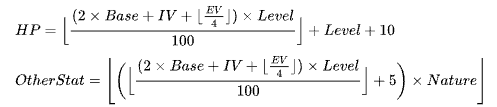

In [ ]:

def hp_calc(base,IV=31,EV=252,level=100):
  return  ((2 * base + IV + (EV//4)) * level)//100 + level + 10


IV=31
EV=252
level=100

max_hp = df["HP"].apply(hp_calc)
max_hp = df["HP"].apply(lambda x : ((2 * x + IV + (EV//4)) * level)//100 + level + 10 )
max_hp

0      294
1      324
2      364
3      364
4      282
      ... 
795    304
796    304
797    364
798    364
799    364
Name: HP, Length: 800, dtype: int64

Q1. Find the lowest possible HP a pokemon can potentially have. Make a list of tuples of (min_HP , max_highest) for each pokemon.

Hints :
  - Feel free to use ```hp_calc``` or implement the equation yourself
  - Note ```IV``` and ```EV``` should both be set to ```0```
  - ```level``` REMAINS ```100```

Example Output:

The output should be a list of tuples, each representing the minimum and maximum HP of a Pokémon:

```[(min_hp_1, max_hp_1), (min_hp_2, max_hp_2), ...]```


In [1]:
### CODE HERE ###

### Pandas Data Types
Pandas has its own set of data types, but it often uses NumPy's data types under the hood. The main Pandas data types are:

- object: For text or mixed numeric and non-numeric values.
- int64, float64, bool: Similar to NumPy's types but with some additional features like handling of missing data.
- datetime64[ns]: For date and time values.
timedelta[ns]: For differences in times.
- category: For categorical data, which can be more memory-efficient than object type for string data with a small number of unique values.
- Int64, Float64, Bool (capitalized): These are Pandas' own versions of integer, float, and boolean types that can handle missing values (NaN), unlike their NumPy counterparts.
Correlation Between Pandas and NumPy Types


In [ ]:
fav_pokemon_ndarray = np.array(series3)
fav_pokemon_ndarray

array(['Greninja', 'Lucario', 'Rayquaza'], dtype=object)

In [ ]:
df.dtypes
df["Attack"].astype("Float64")

0       49.0
1       62.0
2       82.0
3      100.0
4       52.0
       ...  
795    100.0
796    160.0
797    110.0
798    160.0
799    110.0
Name: Attack, Length: 800, dtype: Float64

In [ ]:
df.select_dtypes('int')

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1
3,3,625,80,100,123,122,120,80,1
4,4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6
796,719,700,50,160,110,160,110,110,6
797,720,600,80,110,60,150,130,70,6
798,720,680,80,160,60,170,130,80,6


# **Dataframe**

- **DataFrame:** A two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). It's like a spreadsheet or SQL table.

  - Each column in a Dataframe is effectively a Series

In [ ]:
import pandas as pd # pd is easier to write than pandas
import numpy as np

data = {
    'index' : fav_pokemon_dict.keys(),
    'name' : fav_pokemon_dict.values()
}

df_example = pd.DataFrame(data)
df_example = df_example.set_index("index")
df_example.head()

,name
index,
384,Greninja
448,Lucario
658,Rayquaza


In [ ]:
print(type(df_example["name"]))


<class 'pandas.core.series.Series'>


## *Viewing and Understanding Dataframes*


- **Head:** prints out the first 5 records

In [ ]:
## display all rows
pd.set_option('display.max_columns', 20) # can be set to None
pd.set_option('display.max_rows', 20)
df.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


- **Tail:** prints out the last 5 records

In [ ]:
# tails prints out the last 5
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


- **sample:** prints out a random sample of rows/records

In [ ]:
df.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
631,570,Zorua,Dark,NaN,330,40,65,40,80,40,65,5,False
436,391,Monferno,Fire,Fighting,405,64,78,52,78,52,81,4,False


- **columns:** lists all of the columns

In [ ]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

- **summary:** gives a summary of the data

In [ ]:
df.info()
#df.info(verbose=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


- **describe:** gives a run down of some basic statistics

In [ ]:
df.describe()
# df.iloc[df["HP"].idxmax()] # which pokemon has the highest base HP stat

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


- **shape:** returns a tuple with the number of columns against the number of rows.

In [ ]:
df.shape , len(df)

((800, 13), 800)

- **Is Null:** shows the number of NaN/Null data for each column

In [ ]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- *Number of Unique:* returns the number data

In [ ]:
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

- **Sorting of Columns:** Allows you to sort Data

In [ ]:
df.sort_values(by="Total",ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
288,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False
446,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False


## **Setting Index**

- pd.set_index("column_name") would use the given column as the new index

- This is assuming that df["column_name"] is unique.

In [ ]:
df = df.set_index("Name")

#                   25
Type 1        Electric
Type 2             NaN
Total              320
HP                  35
Attack              55
Defense             40
Sp. Atk             50
Sp. Def             50
Speed               90
Generation           1
Legendary        False
Name: Pikachu, dtype: object

# **Selecting and Extracting Data**


- **Accessing Columns:** You can use square brackets to access any column. Additionally you can also slice columns or send in a list of column names.

In [ ]:
# pd.set_option('display.max_rows', None)
df["Attack"]

Name
Bulbasaur                 49
Ivysaur                   62
Venusaur                  82
VenusaurMega Venusaur    100
Charmander                52
                        ... 
Diancie                  100
DiancieMega Diancie      160
HoopaHoopa Confined      110
HoopaHoopa Unbound       160
Volcanion                110
Name: Attack, Length: 800, dtype: int64

- **Accessing List of Columns:** Additionally you can also slice columns or send in a list of column names.

In [ ]:
df[['Attack','Defense','HP']]

,Attack,Defense,HP
Name,,,
Bulbasaur,49,49,45
Ivysaur,62,63,60
Venusaur,82,83,80
VenusaurMega Venusaur,100,123,80
Charmander,52,43,39
...,...,...,...
Diancie,100,150,50
DiancieMega Diancie,160,110,50
HoopaHoopa Confined,110,60,80


In [ ]:
df[df.columns[6:]]

,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,
Bulbasaur,49,65,65,45,1,False
Ivysaur,63,80,80,60,1,False
Venusaur,83,100,100,80,1,False
VenusaurMega Venusaur,123,122,120,80,1,False
Charmander,43,60,50,65,1,False
...,...,...,...,...,...,...
Diancie,150,100,150,50,6,True
DiancieMega Diancie,110,160,110,110,6,True
HoopaHoopa Confined,60,150,130,70,6,True


- **Conditional Slicing:**

In [ ]:
df[df["Attack"] > 50]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


Q2. Extract Special Attack and Defense Stats from Pokémon Dataset

- Objective:
  - Create a new DataFrame from an existing Pokémon dataset, containing only the columns for Special Attack (Sp. Atk) and Special Defense (Sp. Def).

- Expected Output:
  - special_stats_df should be a DataFrame containing only the Sp. Atk and Sp. Def columns.


In [ ]:
### CODE HERE ###

,Sp. Atk,Sp. Def
Name,,
Bulbasaur,65,65
Ivysaur,80,80
Venusaur,100,100
VenusaurMega Venusaur,122,120
Charmander,60,50
...,...,...
Diancie,100,150
DiancieMega Diancie,160,110
HoopaHoopa Confined,150,130


- **Accessing Rows:** You can use square brackets to access any rows. Additionally you can also slice.

In [ ]:
df[df["#"] == 420]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Cherubi,420,Grass,NaN,275,45,35,45,62,53,35,4,False


## *Loc and ILoc Function*

- Finds the location of a certain record using either index or label for iloc and loc respectivel.


In [ ]:
df.loc["Pikachu"] # uses a hashable label

#                   25
Type 1        Electric
Type 2             NaN
Total              320
HP                  35
Attack              55
Defense             40
Sp. Atk             50
Sp. Def             50
Speed               90
Generation           1
Legendary        False
Name: Pikachu, dtype: object

In [ ]:
df.iloc[30]# uses the index

#                   25
Type 1        Electric
Type 2             NaN
Total              320
HP                  35
Attack              55
Defense             40
Sp. Atk             50
Sp. Def             50
Speed               90
Generation           1
Legendary        False
Name: Pikachu, dtype: object

- you can feed it a list of indexes or labels same as before


In [ ]:
eeveelutions = ["Sylveon", "Umbreon", "Espeon", "Vaporeon", "Jolteon", "Flareon", "Leafeon", "Glaceon"]

df.loc[eeveelutions]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Sylveon,700,Fairy,NaN,525,95,65,65,110,130,60,6,False
Umbreon,197,Dark,NaN,525,95,65,110,60,130,65,2,False
Espeon,196,Psychic,NaN,525,65,65,60,130,95,110,2,False
Vaporeon,134,Water,NaN,525,130,65,60,110,95,65,1,False
Jolteon,135,Electric,NaN,525,65,65,60,110,95,130,1,False
Flareon,136,Fire,NaN,525,65,130,60,95,110,65,1,False
Leafeon,470,Grass,NaN,525,65,110,130,60,65,95,4,False
Glaceon,471,Ice,NaN,525,65,60,110,130,95,65,4,False


In [ ]:
eeveelutions_indices = [df.index.get_loc(name) for name in eeveelutions]
print(eeveelutions_indices)
df.iloc[eeveelutions_indices]

[770, 212, 211, 145, 146, 147, 521, 522]


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Sylveon,700,Fairy,NaN,525,95,65,65,110,130,60,6,False
Umbreon,197,Dark,NaN,525,95,65,110,60,130,65,2,False
Espeon,196,Psychic,NaN,525,65,65,60,130,95,110,2,False
Vaporeon,134,Water,NaN,525,130,65,60,110,95,65,1,False
Jolteon,135,Electric,NaN,525,65,65,60,110,95,130,1,False
Flareon,136,Fire,NaN,525,65,130,60,95,110,65,1,False
Leafeon,470,Grass,NaN,525,65,110,130,60,65,95,4,False
Glaceon,471,Ice,NaN,525,65,60,110,130,95,65,4,False


- loc allows you to slice as well

In [ ]:
df.loc["Vaporeon": "Sylveon":2,["HP","Attack"]]

,HP,Attack
Name,,
Vaporeon,130,65
Flareon,65,130
Omanyte,35,40
Kabuto,30,80
Aerodactyl,80,105
...,...,...
Dragalge,65,75
Clawitzer,71,73
Heliolisk,62,55


- **Slicing Columns:** loc and iloc also provides the means to slice columns

In [ ]:
df.loc[:,"Attack":]

,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,
Bulbasaur,49,49,65,65,45,1,False
Ivysaur,62,63,80,80,60,1,False
Venusaur,82,83,100,100,80,1,False
VenusaurMega Venusaur,100,123,122,120,80,1,False
Charmander,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...
Diancie,100,150,100,150,50,6,True
DiancieMega Diancie,160,110,160,110,110,6,True
HoopaHoopa Confined,110,60,150,130,70,6,True


In [ ]:
df.iloc[:,5:]

,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,
Bulbasaur,49,49,65,65,45,1,False
Ivysaur,62,63,80,80,60,1,False
Venusaur,82,83,100,100,80,1,False
VenusaurMega Venusaur,100,123,122,120,80,1,False
Charmander,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...
Diancie,100,150,100,150,50,6,True
DiancieMega Diancie,160,110,160,110,110,6,True
HoopaHoopa Confined,110,60,150,130,70,6,True


- **Conditional Slicing** : you can send a boolean mask through loc.

In [ ]:
df.loc[df["Attack"] > 50]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


## **Subsetting & Appending to a DataFrame**

- **Subsetting Data:** Subsetting data means selecting specific rows and columns from a DataFrame based on certain conditions or criteria.

In [ ]:
powerful_pokemon = df.loc[df["Total"] > 450]
powerful_pokemon

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [ ]:
powerful_pokemon = df.query("Total > 450")
powerful_pokemon

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


- **Appending New Column:** Adding new columns means introducing new data fields to the DataFrame.

In [ ]:
gen_to_region = {
    1: "Kanto",
    2: "Johto",
    3: "Hoenn",
    4: "Sinnoh",
    5: "Unova",
    6: "Kalos",
    7: "Alola",
    8: "Galar"
}

df["Region"] = df["Generation"].apply(lambda x: gen_to_region[x])
df.sample(10)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
Name,,,,,,,,,,,,,
Scatterbug,664,Bug,NaN,200,38,35,40,27,25,35,6,False,Kalos
Kecleon,352,Normal,NaN,440,60,90,70,60,120,40,3,False,Hoenn
Octillery,224,Water,NaN,480,75,105,75,105,75,45,2,False,Johto
Lunatone,337,Rock,Psychic,440,70,55,65,95,85,70,3,False,Hoenn
Genesect,649,Bug,Steel,600,71,120,95,120,95,99,5,False,Unova
Maractus,556,Grass,NaN,461,75,86,67,106,67,60,5,False,Unova
Altaria,334,Dragon,Flying,490,75,70,90,70,105,80,3,False,Hoenn
Darkrai,491,Dark,NaN,600,70,90,90,135,90,125,4,True,Sinnoh
WormadamTrash Cloak,413,Bug,Steel,424,60,69,95,69,95,36,4,False,Sinnoh


- **Dropping Columns:** Dropping columns means removing specific columns from the DataFrame.

In [ ]:
df = df.drop('Region', axis=1)
df.sample(10)

# df = df[df.columns[:-1]]
# df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
KangaskhanMega Kangaskhan,115,Normal,NaN,590,105,125,100,60,100,100,1,False
Roserade,407,Grass,Poison,515,60,70,65,125,105,90,4,False
Flareon,136,Fire,NaN,525,65,130,60,95,110,65,1,False
Ducklett,580,Water,Flying,305,62,44,50,44,50,55,5,False
ManectricMega Manectric,310,Electric,NaN,575,70,75,80,135,80,135,3,False
Hitmonchan,107,Fighting,NaN,455,50,105,79,35,110,76,1,False
GarchompMega Garchomp,445,Dragon,Ground,700,108,170,115,120,95,92,4,False
Floette,670,Fairy,NaN,371,54,45,47,75,98,52,6,False
Mantyke,458,Water,Flying,345,45,20,50,60,120,50,4,False


- **Adding Row:** Dropping columns means removing specific columns from the DataFrame.

In [ ]:
corviknight = {
    'Name' : 'Corviknight',
    '#' : 823,
    'Type 1': 'Flying',
    'Type 2': 'Steel',
    'HP': 98,
    'Attack': 87,
    'Defense': 105,
    'Sp. Atk': 53,
    'Sp. Def': 85,
    'Speed': 67,
    'Total': 495,
    'Generation': 8,
    'Legendary': False
}

# You can add this record to your DataFrame using:
# df = df.append(pd.DataFrame(corviknight,index=[0]).set_index('Name'))
# pd.concat([df.loc[:],pd.DataFrame(corviknight,index=[0]).set_index('Name')])
df.loc["Corviknight"] = {
    '#' : 823,
    'Type 1': 'Flying',
    'Type 2': 'Steel',
    'HP': 98,
    'Attack': 87,
    'Defense': 105,
    'Sp. Atk': 53,
    'Sp. Def': 85,
    'Speed': 67,
    'Total': 495,
    'Generation': 8,
    'Legendary': False
}
df.tail()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True
HoopaHoopa Unbound,720,Psychic,Dark,680,80,160,60,170,130,80,6,True
Volcanion,721,Fire,Water,600,80,110,120,130,90,70,6,True
Corviknight,823,Flying,Steel,495,98,87,105,53,85,67,8,False


- **Removing a row Row:** Removing

- **Dropping Row:** Dropping columns means removing specific columns from the DataFrame.

In [ ]:
df = df.loc[df.index != 'Corviknight']
df.tail()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
Name,,,,,,,,,,,,,
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True,Kalos
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True,Kalos
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Kalos
HoopaHoopa Unbound,720,Psychic,Dark,680,80,160,60,170,130,80,6,True,Kalos
Volcanion,721,Fire,Water,600,80,110,120,130,90,70,6,True,Kalos


# **Aggregation using .groupby() in pandas**

pandas lets you aggregate values by grouping them by specific column values. You can do that by combining the .groupby() method with a summary method of your choice. The below code displays the mean of each of the numeric columns grouped by Outcome.


In [ ]:
df.groupby('Type 1').mean()

<ipython-input-457-593fb63c81d3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Type 1').mean()


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [ ]:
df.groupby(['Type 1', 'Type 2']).mean()

#       Total         HP      Attack     Defense  \
Type 1 Type 2                                                                
Bug    Electric  595.500000  395.500000  60.000000   62.000000   55.000000   
       Fighting  214.000000  550.000000  80.000000  155.000000   95.000000   
       Fire      636.500000  455.000000  70.000000   72.500000   60.000000   
       Flying    286.285714  419.500000  63.000000   70.142857   61.571429   
       Ghost     292.000000  236.000000   1.000000   90.000000   45.000000   
...                     ...         ...        ...         ...         ...   
Water  Ice       103.000000  511.666667  90.000000   83.333333  113.333333   
       Poison    118.666667  426.666667  61.666667   68.333333   58.333333   
       Psychic   111.800000  481.000000  87.000000   73.000000  104.000000   
       Rock      430.000000  428.750000  70.750000   82.750000  112.750000   
       Steel     395.000000  530.000000  84.000000   86.000000   88.000000   

                    Sp. Atk     Sp. Def      Speed  Generation  Legendary  
Type 1 Type 2                                                              
Bug    Electric   77.000000   55.000000  86.500000    5.000000        0.0  
       Fighting   40.000000  100.000000  80.000000    2.000000        0.0  
       Fire       92.500000   80.000000  80.000000    5.000000        0.0  
       Flying     72.857143   69.071429  82.857143    2.857143        0.0  
       Ghost      30.000000   30.000000  40.000000    3.000000        0.0  
...                     ...         ...        ...         ...        ...  
Water  Ice        80.000000   78.333333  66.666667    1.000000        0.0  
       Poison     61.666667   91.666667  85.000000    1.333333        0.0  
       Psychic    94.000000   79.000000  44.000000    1.200000        0.0  
       Rock       61.500000   65.000000  36.000000    3.750000        0.0  
       Steel     111.000000  101.000000  60.000000    4.000000        0.0  

[136 rows x 10 columns]

## Cleaning Data

- Changing the Naming of Mega Pokemon


In [ ]:
## The index of Mega Pokemons contained extra and unneeded text. Removed all the text before "Mega"
df.index = df.index.str.replace(".*(?=Mega)", "")
df.head(10)

<ipython-input-459-6b24d8d4f765>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace(".*(?=Mega)", "")


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False



- Dealing with Null data in Type2

In [ ]:
#some values in TYPE2 are empty and thus they have to be filled or deleted
df['Type 2'].fillna(df['Type 1'], inplace=True) #fill NaN values in Type2 with corresponding values of Type
df.head(10)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


- Removing the original entry number.

In [ ]:
df = df.drop("#",axis=1)

- subset of Non Mega Pokemon / Non Primal

In [ ]:
df_filtered = df.loc[~df.index.str.contains('Mega','Primal')]

Q3. Identify Pokémon with the Highest Individual Stats

- Objective:
  - Determine which Pokémon has the highest value in each individual stat in a given Pokémon dataset.

- Expected Output:
  - highest_stats should be a dictionary with keys like "Max HP", "Max Attack", etc., and their corresponding Pokémon names as values.

In [ ]:
### CODE HERE ###

## Correlation between the attributes ?

<ipython-input-464-fe67b9012f6d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap


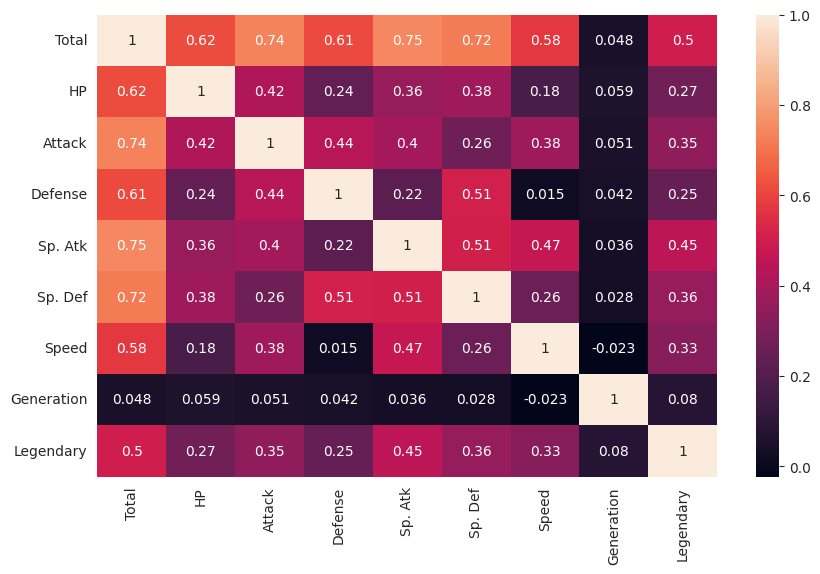

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

plt.figure(figsize=(10,6)) #manage the size of the plot
sns.heatmap(df.corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

## What is the distribution of Pokemon Types?

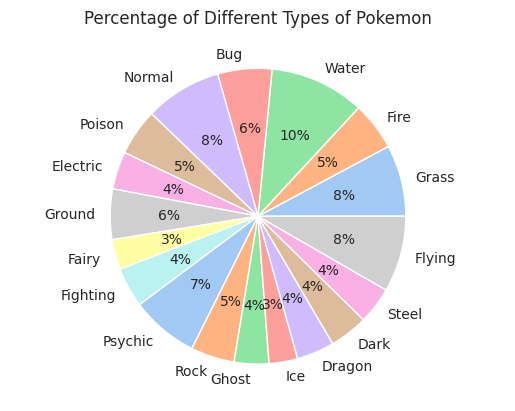

In [ ]:
types = df['Type 1'].unique()
counts = [len(df.query('`Type 1` == @typ or `Type 2` == @typ')) for typ in types ]

colors = sns.color_palette('pastel')

plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.pie(counts, labels = types, colors = colors, autopct='%.0f%%')
plt.show()

## Attack by Type

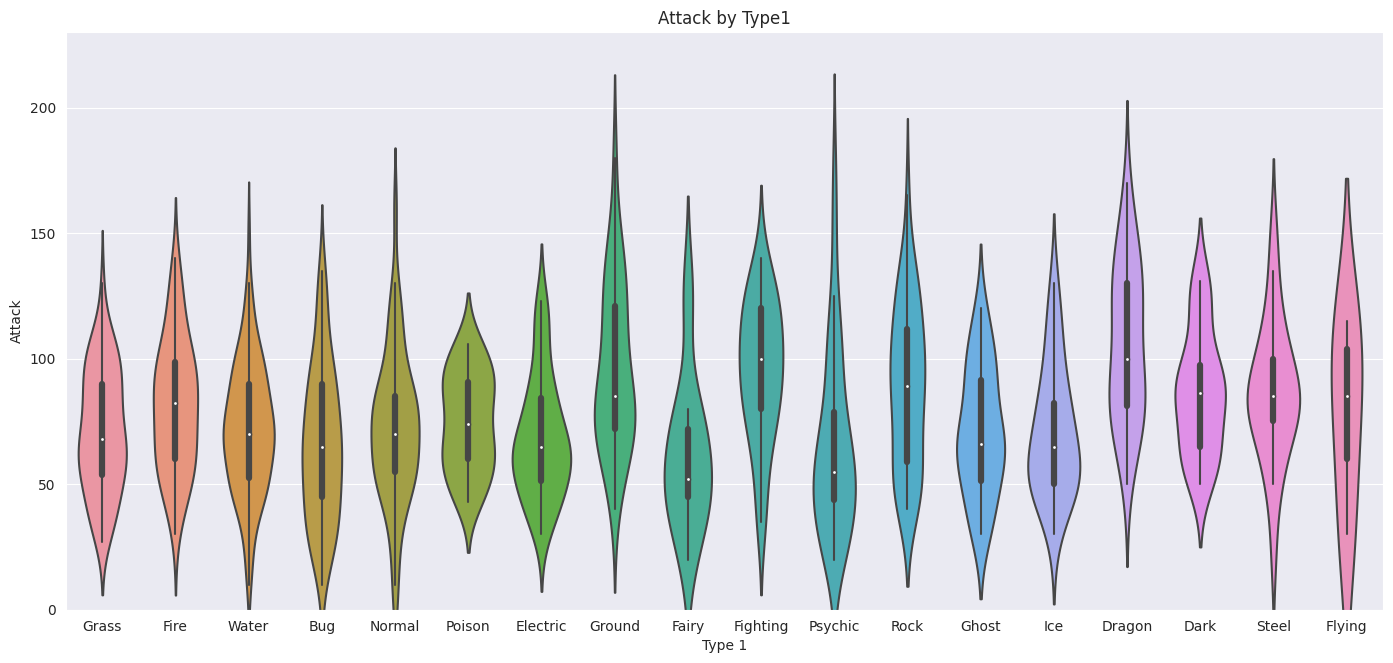

In [ ]:
plt.subplots(figsize = (17,7.5))
plt.title('Attack by Type1')
sns.violinplot(x = "Type 1", y = "Attack",data = df_filtered)
plt.ylim(0,230)
plt.show()

# Strongest Region of Pokemon



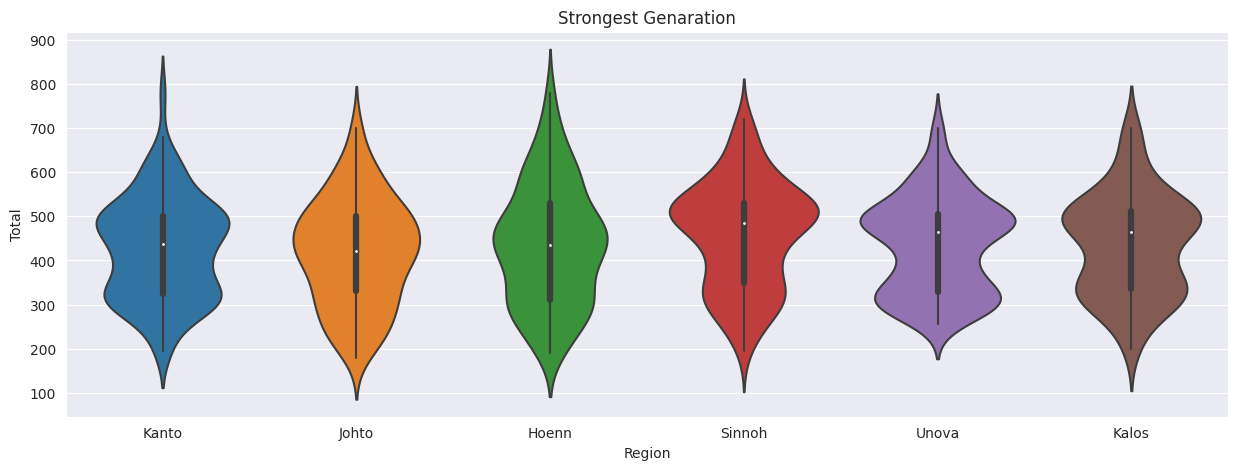

In [ ]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Genaration')
sns.violinplot(x = "Region", y = "Total",data = df)
plt.show()

# Base Total by Type 1

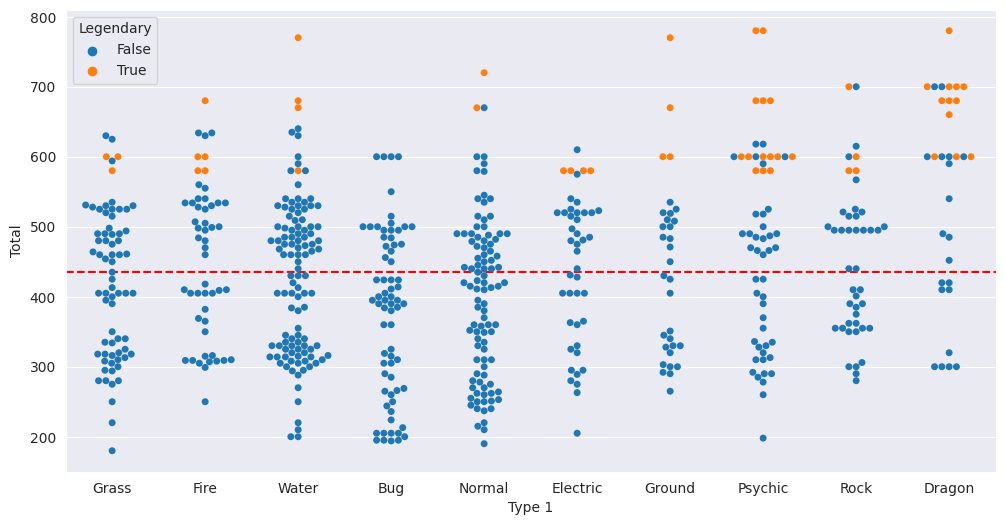

In [ ]:
plt.figure(figsize=(12,6))
top_types=df['Type 1'].value_counts()[:10] #take the top 10 Types
df1=df[df['Type 1'].isin(top_types.index)] #take the pokemons of the type with highest numbers, top 10
sns.swarmplot(x='Type 1',y='Total',data=df1,hue='Legendary') # this plot shows the points belonging to individual pokemons
# It is distributed by Type
plt.axhline(df1['Total'].mean(),color='red',linestyle='dashed')
plt.show()